In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

In [137]:
df = pd.read_csv('pokemon.csv')
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [138]:
print(df.columns)

Index(['number', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'legendary'],
      dtype='object')


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


## K-Means 

c:\Users\dtoloza\Anaconda3\envs\complexity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dtoloza\Anaconda3\envs\complexity\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


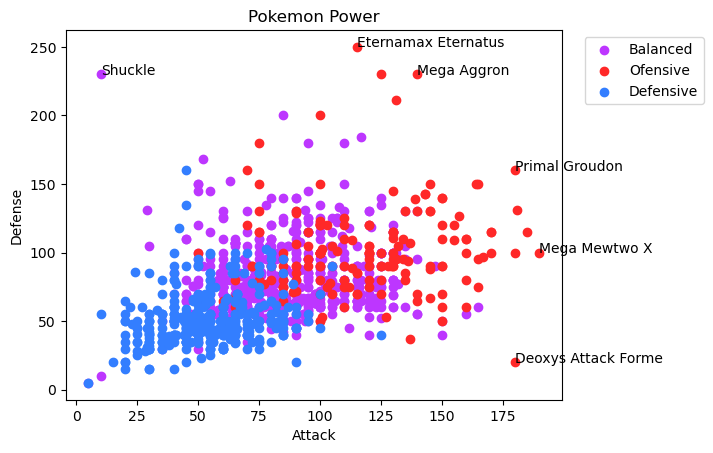

In [140]:
# Choose features for clustering
X = df[['total', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

# Define the number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.predict(X)

# Add the cluster labels to the dataset
df['Cluster'] = labels

# Color labels
color_labels = ['Balanced', 'Ofensive', 'Defensive']

# Plotting the clusters
colors = ['#BD36FF', '#FF2828', '#337EFF']
for i in range(3):
    plt.scatter(df[df['Cluster'] == i]['attack'], df[df['Cluster'] == i]['defense'], c=colors[i], label= color_labels[i])

# Calculate Z-scores for each feature
X_zscore = zscore(X)

# Set Z-score threshold for identifying outliers
zscore_threshold = 3

# Set the list of Pokemon names to plot
pokemon_names_to_plot = ['Shuckle', 'Deoxys Attack Forme', 'Eternamax Eternatus', 'Mega Mewtwo X', 'Primal Groudon', 'Mega Aggron']

# Identify outlier data points based on Z-score threshold and Pokemon names to plot
outliers = ((X_zscore > zscore_threshold).any(axis=1)) & (df['name'].isin(pokemon_names_to_plot))

# Get attack and defense values for outliers
outlier_attacks = df[outliers]['attack']
outlier_defenses = df[outliers]['defense']
outlier_names = df[outliers]['name']

# Plotting chosen outliers names 
for i, name in enumerate(outlier_names):
    plt.annotate(name, (outlier_attacks.iloc[i], outlier_defenses.iloc[i]))


# Details
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('Pokemon Power')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()


When i used the Z-Score method, some names were messy, and impossible to see <br>
I used the method below to find those names and plot them

In [141]:
result = df[df['name'].str.endswith('ron')]
print(result)

     number         name  type1 type2  total  hp  attack  defense  sp_attack  \
375     304         Aron  Steel  Rock    330  50      70      100         40   
376     305       Lairon  Steel  Rock    430  60      90      140         50   
377     306       Aggron  Steel  Rock    530  70     110      180         60   
378     306  Mega Aggron  Steel   NaN    630  70     140      230         60   

     sp_defense  speed  generation  legendary  Cluster  
375          40     30           3      False        2  
376          50     40           3      False        0  
377          60     50           3      False        0  
378          80     50           3      False        1  


## Legendary Classifier - Cool Implementation i found right there in the kagle site for the data set

In [142]:
df.groupby('legendary').size()

legendary
False    954
True     118
dtype: int64

In [143]:
df[df['legendary']==True]

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Cluster
194,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,1
195,144,Galarian Articuno,Psychic,Flying,580,90,85,85,125,100,95,8,True,1
196,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,1
197,145,Galarian Zapdos,Fighting,Flying,580,90,125,90,85,90,100,8,True,1
198,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True,1
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True,1
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True,0
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True,1


In [144]:
X = df[['total','hp','attack','defense','sp_attack','sp_defense','speed']]
y = df.legendary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [145]:
model = RandomForestClassifier(max_leaf_nodes=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10)